# 12R_crm_target_mpra_go.ipynb

11/28/22

make plots for crm target get info

In [ ]:
library(pheatmap)  
library(tidyverse)
library(ggfortify)
library(RColorBrewer)
library(viridis)
library(reshape2)
library(Rtsne)
library( org.Hs.eg.db ) 
library(AnnotationDbi) 
library(Biobase)
library(limma)
library(tximport)

library(stringr)

library(Rtsne)
library(caret)  
library(clusterProfiler)
library(pheatmap)
library(ReactomePA)
library(annotate)
library(seqinr)
# library(qlcMatrix)


In [2]:
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}


In [8]:
save_prefix = '/Users/mguo123/Documents/pan_omics_psych/data/processed/mpra_egenes/'

## get genes

In [9]:
tfs = c('ARNT',
 'IRF3',
 'MAFA',
 'NFATC3',
 'NFKB1',
 'NR1H3',
 'PBX1',
 'PBX2',
 'POU5F1',
 'RFX2',
 'SHOX2',
 'SREBF1',
 'TEF',
 'ZKSCAN3',
 'ZNF322',
 'ZSCAN31')

In [11]:
all_genes =c()
genes_entrez_all = list()
for (tf in tfs){
    filename = paste0(save_prefix,tf,'.txt')
    genes  = read.csv(filename,header=F)$V1
    genes_entrez = bitr(unique(sort(genes)), fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
    genes_entrez_all[[tf]] = unique(sort(genes_entrez))
    all_genes = c(all_genes,genes_entrez_all[[tf]] )
    print(length(genes_entrez_all[[tf]] ))

}
length(all_genes)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“11.54% of input gene IDs are fail to map...”


[1] 46


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“6.02% of input gene IDs are fail to map...”


[1] 125


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“3.85% of input gene IDs are fail to map...”


[1] 25


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“4.17% of input gene IDs are fail to map...”


[1] 23


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“5.08% of input gene IDs are fail to map...”


[1] 56


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“5.79% of input gene IDs are fail to map...”


[1] 114


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“5.88% of input gene IDs are fail to map...”


[1] 80


'select()' returned 1:1 mapping between keys and columns



[1] 20


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“4.65% of input gene IDs are fail to map...”


[1] 41


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“4.39% of input gene IDs are fail to map...”


[1] 109


'select()' returned 1:1 mapping between keys and columns



[1] 9


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“5.41% of input gene IDs are fail to map...”


[1] 70


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“17.65% of input gene IDs are fail to map...”


[1] 14


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“10.34% of input gene IDs are fail to map...”


[1] 26


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“7.69% of input gene IDs are fail to map...”


[1] 60


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(unique(sort(genes)), fromType = "SYMBOL", toType = "ENTREZID", :
“6.86% of input gene IDs are fail to map...”


[1] 95


[1] 913

In [12]:
ck_go_bp <- compareCluster(geneCluster = genes_entrez_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 1,
                                qvalueCutoff  = 1,
                                OrgDb='org.Hs.eg.db', 
                                ont = "BP",
                                readable=TRUE)
head(as.data.frame(ck_go_bp))
write.csv(ck_go_bp, file=paste0(save_prefix, 'ck_go_bp_05.csv'))


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,ARNT,GO:0051238,sequestering of metal ion,2/44,16/18670,0.0006378512,0.3309522,0.2979996,FTL/SLC30A3,2
2,ARNT,GO:0009312,oligosaccharide biosynthetic process,2/44,18/18670,0.0008108278,0.3309522,0.2979996,SLC2A1/MPDU1,2
3,ARNT,GO:0060216,definitive hemopoiesis,2/44,20/18670,0.0010038995,0.3309522,0.2979996,ZFPM1/CBFB,2
4,ARNT,GO:0006369,termination of RNA polymerase II transcription,2/44,35/18670,0.0030740555,0.3318709,0.2988269,CLP1/SSU72,2
5,ARNT,GO:0033146,regulation of intracellular estrogen receptor signaling pathway,2/44,39/18670,0.0038055623,0.3318709,0.2988269,WBP2/CBFB,2
6,ARNT,GO:0072350,tricarboxylic acid metabolic process,2/44,39/18670,0.0038055623,0.3318709,0.2988269,IDH1/ASS1,2


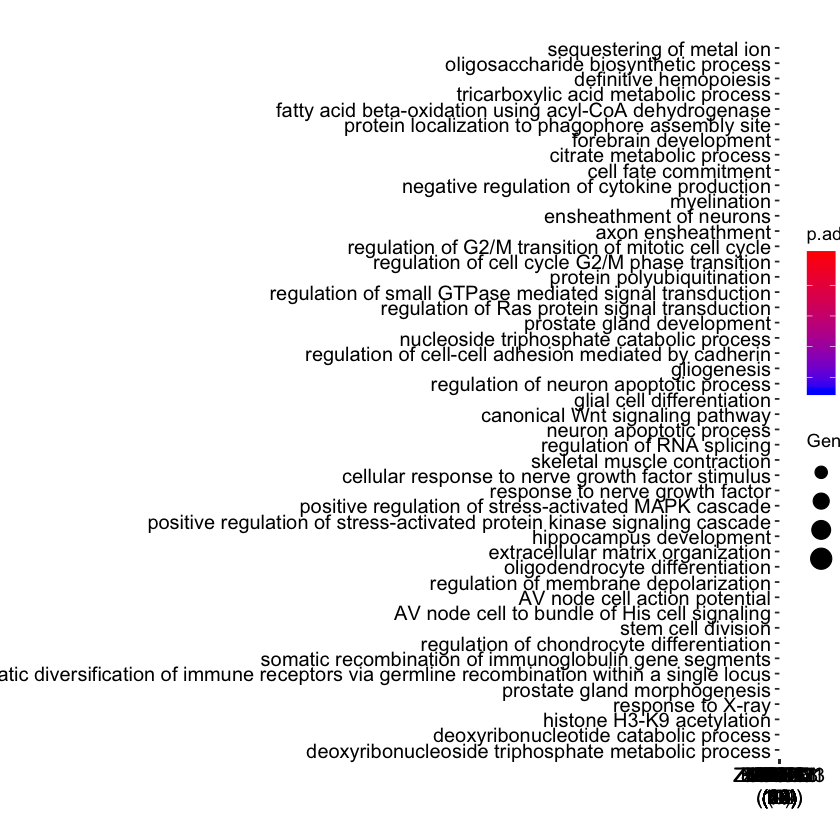

In [22]:
dotplot(ck_go_bp, showCategory=3)
# ggsave(file = paste0(save_prefix, "ck_go_bp_groups.pdf"),height=12, width=19)

In [50]:
go_term_ordering = c(
'myelin assembly',
'myelination',
'ensheathment of neurons',
'forebrain development',
'citrate metabolic process',
'cell fate commitment',
'regulation of G2/M transition of mitotic cell cycle',
'negative regulation of cytokine production',
'protein polyubiquitination',
'regulation of calcium ion transmemebrane transporter activity',
'sensory perception of mechanical stimulus',
'glial cell differentiation',
'regulation of neuron apoptotic process',
'cellular response to nerve growth factor stimulus',
'transcription by RNA polymerase III',
'positive regulation of stress-activated MAPK cascade',
'telencephalon cell migration',
'forebrain cell migration',
'hippocampus development',
'oligodendrocyte differentiation',
'limbic system development',
'regulation of membrane depolarization',
'AV node cell action potential',
'positive regulation of membrane depolarization',
'stem cell division',
'somatic recombination fo immunoglobulin gene segments',
'somatic cell DNA recombination')

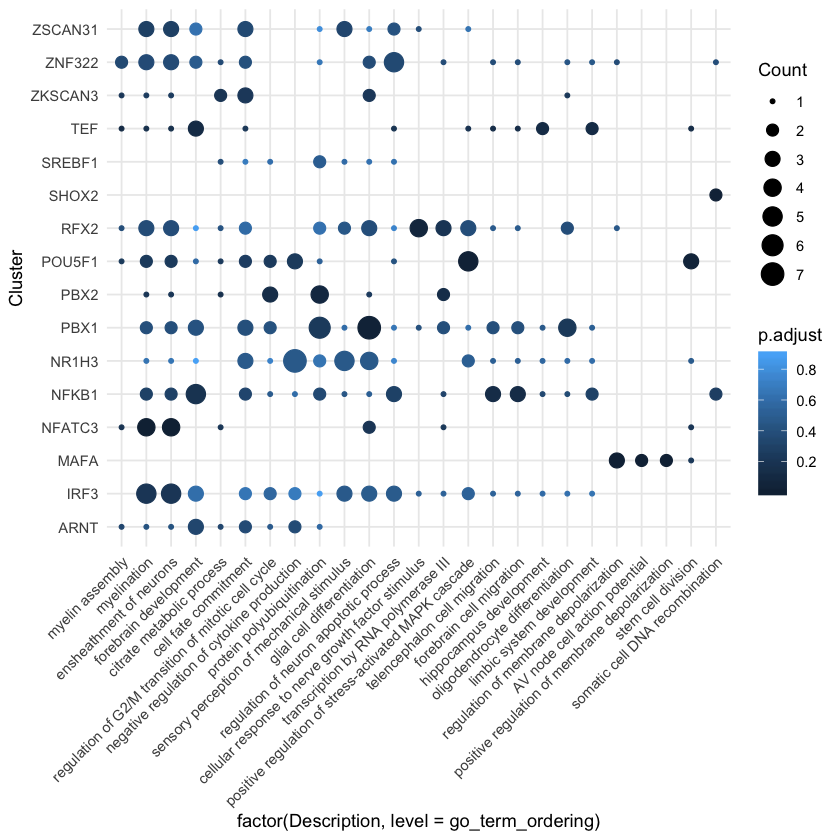

In [54]:
p_dot_tissue = ggplot(data.frame(ck_go_bp)%>%filter (Description %in% go_term_ordering), aes(x=factor(Description,level=go_term_ordering), y = Cluster,
                                                   color=p.adjust,size=Count))+
    geom_point()+
#     scale_color_manual(values=color_order)+
    theme_minimal()+
    theme(axis.text.x = element_text(angle = 45,hjust=1))
p_dot_tissue
ggsave(paste0(save_prefix,'go_plot_edit.eps'),height=6,width=8)

In [24]:
rna_df = read.csv('/Users/mguo123/Documents/pan_omics_psych/data/interim/rna/tissue_tpm_sym.csv',row.names=1)
colnames(rna_df)
colnames(rna_df)= c('AST','A.NPC.D0','A.NPC.D2','P.NPC.D0','P.NPC.D2','ES','N.D2','N.D10','N.D28')
rna_df = rna_df[,c('AST','ES','N.D2','N.D10','N.D28','A.NPC.D0','A.NPC.D2','P.NPC.D0','P.NPC.D2')]
head(rna_df)

[1] "Astrocytes" "SL_D0"      "SL_D2"      "SLC_D0"     "SLC_D2"    
[6] "H9_D0"      "H9_D2"      "H9_D10"     "H9_D28"

,AST,ES,N.D2,N.D10,N.D28,A.NPC.D0,A.NPC.D2,P.NPC.D0,P.NPC.D2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,18.660,12.485,7.470000000,5.27,5.475,7.230,4.01666667,6.993333333,3.616666667
A1BG-AS1,0.430,0.915,2.770000000,3.30,3.710,2.040,2.71000000,1.656666667,2.700000000
A1CF,0.010,0.000,0.006666667,0.11,0.160,0.015,0.02666667,0.010000000,0.003333333
A2M,50.670,0.020,15.666666667,3.74,2.970,0.055,2.48333333,0.156666667,6.546666667
A2M-AS1,0.070,0.285,0.680000000,5.34,7.985,2.580,1.67000000,0.996666667,2.160000000
A2ML1,0.055,5.020,1.066666667,0.06,0.000,0.115,0.01333333,0.006666667,0.000000000


In [ ]:
annon_df = data.frame(
tf=tfs,
dz=c('SCZ',)
)

Warning message in brewer.pal(n = 11, name = "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


pdf 
  2

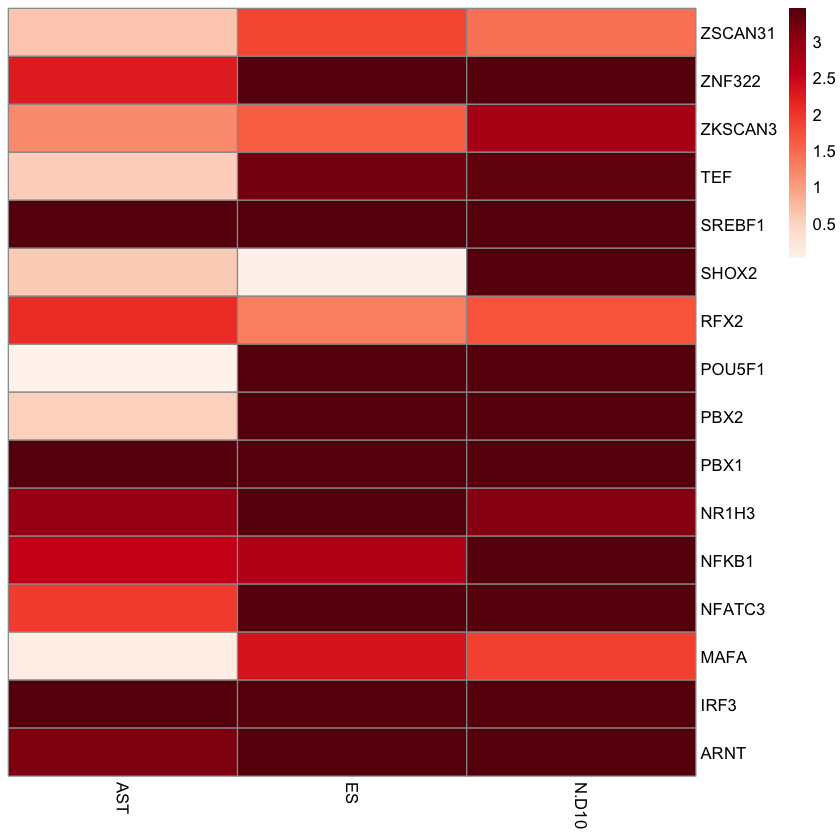

In [57]:
df =  rna_df[rev(tfs),c('AST','ES','N.D10')] 

df[df>10] = 10

df = log2(df+1)
p = pheatmap(df,cluster_cols=F,cluster_rows=F, 
             color = colorRampPalette(brewer.pal(n =11, name ="Reds"))(255))

save_pheatmap_pdf(p, paste0(save_prefix,'rna_expr_tfs.pdf'),height=6,width=2.5)

In [27]:
brainmap_expr_df_region = read.csv(paste0('/Users/mguo123/Documents/pan_omics_psych/data/processed/fig1/rna_10xm1/', 'brainmap_expr_df_region.csv'),row.names=1)
dim(brainmap_expr_df_region)


[1]     8 50281

In [33]:
data.frame(colSums(brainmap_expr_df_region[,tfs]))

,colSums.brainmap_expr_df_region...tfs..
,<dbl>
ARNT,41.0
IRF3,0.0
MAFA,0.0
NFATC3,66.0
NFKB1,130.0
NR1H3,0.0
PBX1,2574.5
PBX2,0.0
POU5F1,0.0
